In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import files
uploaded=files.upload()

Saving tips.csv to tips.csv


In [3]:
tips=pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


https://www.kaggle.com/tasneemabdulrahim/tips-dataset

In [5]:
# 피벗 테이블

pd.pivot_table(tips,
               index='day', columns='size',values='total_bill', aggfunc='count', fill_value=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [6]:
# 빈도표

party_counts=pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [8]:
pc_25=party_counts.loc[:, 2:5] # loc의 경우 끝점 포함됨.  iloc는 불포함
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [9]:
# pc_25 각 열방향 합계 1로 정규화
pc_25.apply(lambda x: x/pc_25.sum(1))

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [10]:
pc_25.div(pc_25.sum(1), axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같음:

마크업(markup) : 약 11.11%
* 마크업은 기본 비용에 대한 추가 비용 (여기서는 팁)의 비율
* tip/(total bill - tip)*100

마진 (margin) : 10%
* 마진은 전체 판매 가격 (여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
* tip/total bill*100

마크업은 순수한 비용 (총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

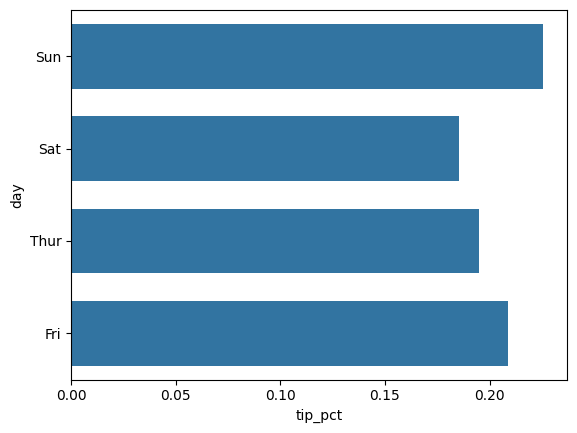

In [12]:
# 요일별 팁의 비중을 시각화 (수평 막대그래프)
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip']) # tip 비중
print(tips.head())
sns.barplot(x='tip_pct', y='day',data=tips, orient='h', errorbar=None, width=0.7) # errorbar는 오차 막대를 제어

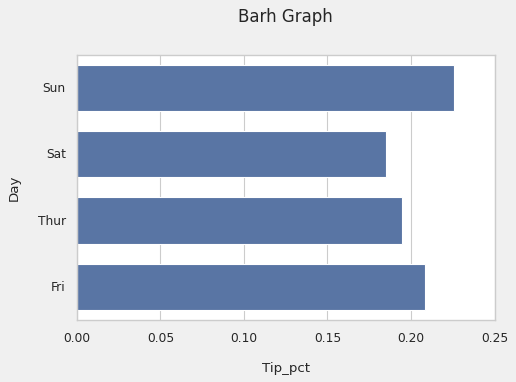

In [40]:
# 요일별 팁의 비중을 시각화 (수평 막대그래프) - sns.set 사용하여 미화:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.set(style='whitegrid')

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
# print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h', errorbar=None, width=0.7) # errorbar는 오차 막대를 제어

plt.title('Barh Graph', pad=30, fontsize=15)
plt.xlabel('Tip_pct',labelpad=15,fontsize=12)
plt.ylabel('Day',labelpad=15,fontsize=12)
plt.show()

<Axes: xlabel='tip_pct', ylabel='day'>

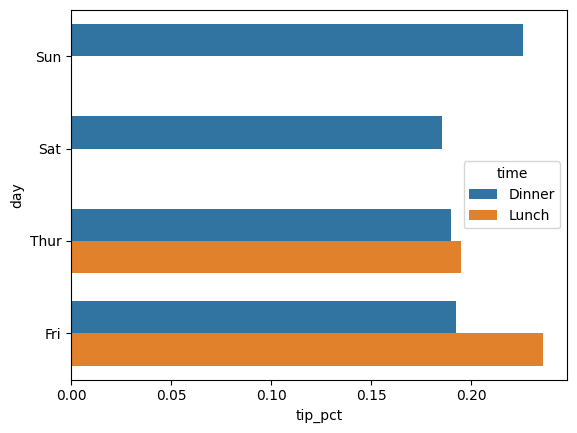

In [13]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', errorbar=None, width=0.7) # dinner, lunch 타임 구분을 위해 hue='time 추가

<Axes: xlabel='tip_pct', ylabel='day'>

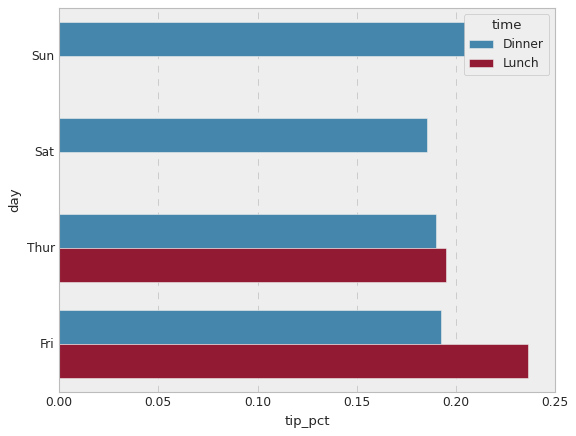

In [36]:
# sns.set_style('')로 위 바그래프 미화:
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
sns.set_style('whitegrid')
plt.style.use('bmh')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', errorbar=None, width=0.7) # dinner, lunch 타임 구분을 위해 hue='time 추가

In [14]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


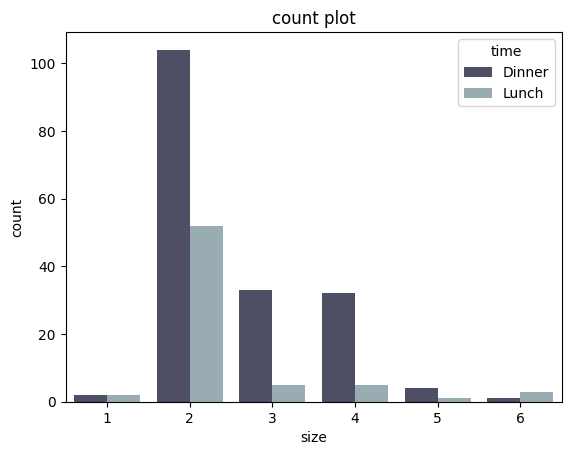

In [15]:
# countplot()
sns.countplot(x='size', data=tips, hue='time', palette='bone') # 타임 별 테이블 사이즈 (인원수)
plt.title("count plot")
plt.show()

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [17]:
available_styles=sns.axes_style()
print(available_styles)

{'axes.facecolor': 'white', 'axes.edgecolor': 'black', 'axes.grid': False, 'axes.axisbelow': 'line', 'axes.labelcolor': 'black', 'figure.facecolor': 'white', 'grid.color': '#b0b0b0', 'grid.linestyle': '-', 'text.color': 'black', 'xtick.color': 'black', 'ytick.color': 'black', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>, 'patch.edgecolor': 'black', 'patch.force_edgecolor': False, 'image.cmap': 'viridis', 'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'], 'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


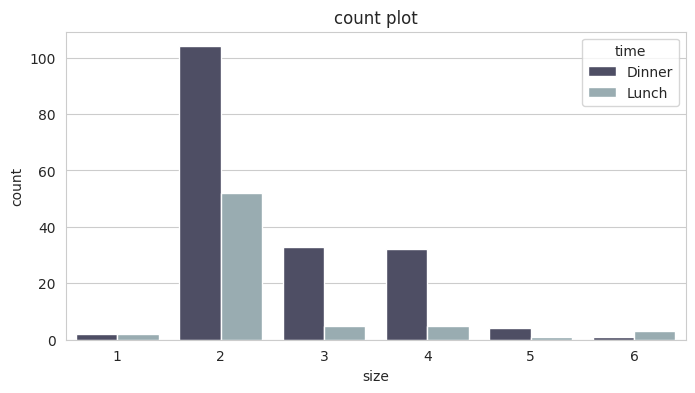

In [19]:
# countplot()
# sns.set_style을 통한 그래프 미화 작업

plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='size', data=tips, hue='time', palette='bone') # 타임 별 테이블 사이즈 (인원수)
plt.title("count plot")
plt.show()

커널밀도추정(Kernel Density Estimation, KDE)
- kde=True는 Seaborn의 histplot 함수에서 커널 밀도 추정(Kernel Density Estimation, KDE)을 활성화하는 옵션
- 히스토그램과 함께 데이터의 분포를 부드럽게 추정한 커널 밀도 그래프가 표시
- KDE 그래프는 데이터 포인트들이 어떻게 분포되어 있는지 시각적으로 보여주는 부드러운 곡선을 생성

In [41]:
# np.random.normal(loc, scale, size) :  정규분포 난수 샘플
comp1=np.random.normal(0,1,size=200)
comp2=np.random.normal(10,2,size=200)
values=pd.Series(np.concatenate([comp1, comp2]))
values.describe()

count    400.000000
mean       4.918524
std        5.114851
min       -2.277259
25%        0.052397
50%        3.993898
75%        9.644025
max       14.656251
dtype: float64

Q. 두개의 정규분포를 따르는 상이한 데이터셋을 생성한 후 하나의 그래프에 그려보세요

In [43]:
from google.colab import files
filename=files.upload()

Saving fm2.csv to fm2.csv


In [ ]:
fish_multi=pd.read_csv('fm2.csv')
fish_multi

<Axes: xlabel='length', ylabel='Count'>

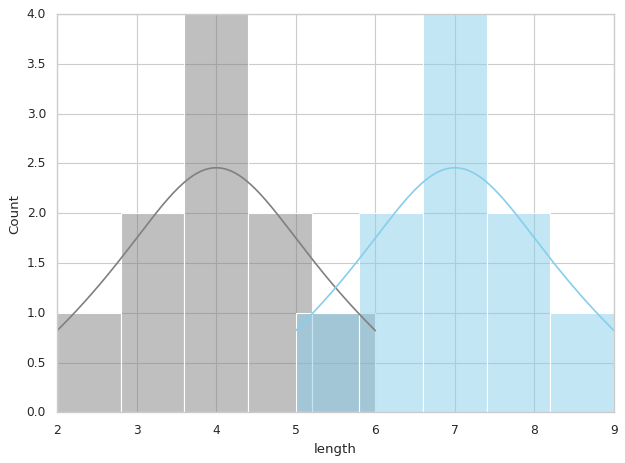

In [47]:
# 두개의 다른 종에 대한 분포를 한 그래프에서 나타내기:

length_a=fish_multi.query('species=="A"')['length']
length_b=fish_multi.query('species=="B"')['length']
sns.histplot(length_a, bins=5, color='gray',kde=True)
sns.histplot(length_b, bins=5, color='skyblue',kde=True)

<Axes: xlabel='species', ylabel='length'>

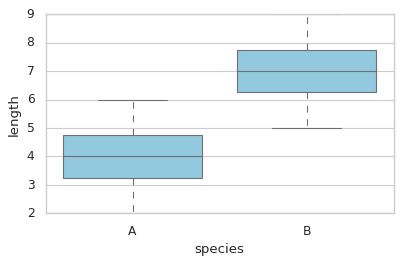

In [52]:
# boxplot으로 A, B 비교 한판에
plt.figure(figsize=(5,3))
sns.boxplot(x='species', y='length',data=fish_multi, color='skyblue')

<Axes: xlabel='species', ylabel='length'>

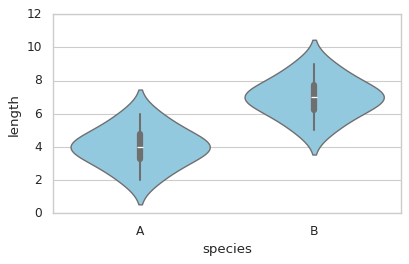

In [53]:
# 바이올린 플롯 :
# 박스 플롯과 커널 밀도 추정을 결합한 형태로 데이터의 형태를 좀 더 직관적으로 이해할 수 있게 해줌
# 커널 밀도추정의 결과를 y 축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
plt.figure(figsize=(5,3))
sns.violinplot(x='species',y='length', data=fish_multi,color='skyblue')

In [54]:
from google.colab import files
filesname=files.upload()

Saving cov.csv to cov.csv


In [55]:
cov_data=pd.read_csv('cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


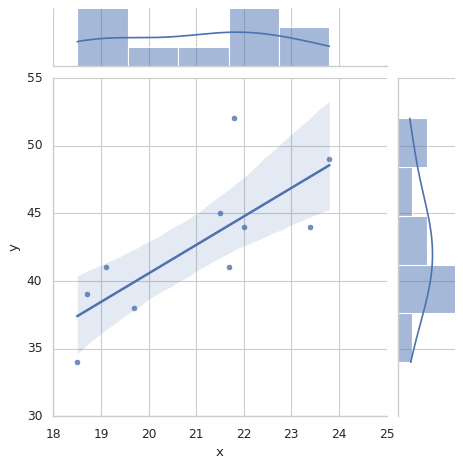

In [57]:
# JointPlot :
# 산점도와 함께 각각의 변수에 대한 히스토그램이나 커널밀도추정을 결합하여
# 변수 간의 과계와 각 변수의 분포를 동시에 탐색할 수 있게 해줌

# Assuming 'cov_data' is your DataFrame and it has columns 'x' and 'y'
sns.jointplot(x='x',y='y', data=cov_data, kind='reg')
# reg=regression. 회귀 보고 싶지 않으며 코드에서 제외시키면 됨
# x, y의 히스토그램과 kde,
# x와 y 간의 산점도와 추세선, 오차의 범위까지 (추세선 위 아래로 있는 옅은 배경색 부분)
plt.show()

sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 카테고리별로 분할하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
sns.regplot: 이 함수는 단일 축 객체(ax)에 회귀선을 그리는 데 사용. 간단하고, 한 번에 하나의 관계만 표시.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.



In [58]:
# 'x'와 'y열을 데이터 포인트로 사용하고, 'category' 열에 따라 서로 다른 색상의 선형 회귀선을 그렸습니다.
# 각 카테고리 (A, B)에 대한 회귀선이 서로 다른 색상으로 표시

# 임의의 데이터 생성
np.random.seed(1)
data=pd.DataFrame({
    'x': np.random.rand(50),
    'y': np.random.rand(50),
    'category':np.random.choice(['A','B'], 50)
})

In [60]:
data.head()

,x,y,category
0,0.417022,0.019367,A
1,0.720324,0.678836,A
2,0.000114,0.211628,A
3,0.302333,0.265547,A
4,0.146756,0.491573,B


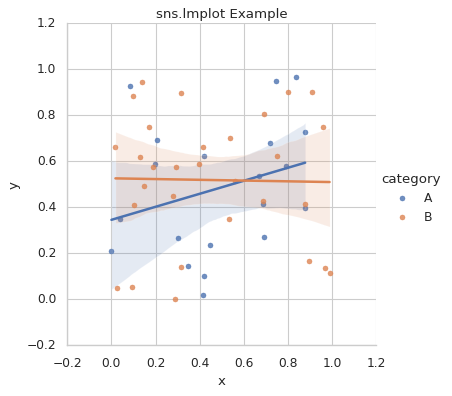

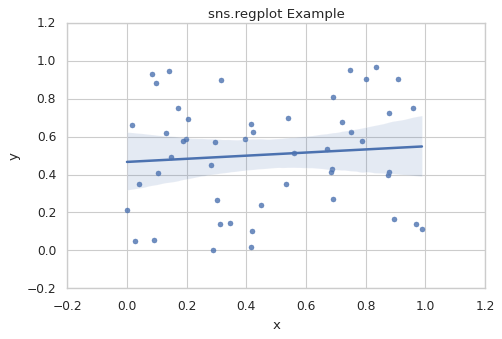

In [63]:
# sns.lmplot 사용 예시
sns.lmplot(x='x',y='y',data=data, hue='category')
plt.title('sns.lmplot Example')
plt.show()

# sns.regplot 사용 예시
plt.figure(figsize=(6,4))
sns.regplot(x='x',y='y', data=data)
plt.title('sns.regplot Example')
plt.show()

Q. auoto-mpg 데이터셋

In [65]:
from google.colab import files
filename=files.upload()

Saving auto-mpg.xlsx to auto-mpg.xlsx


In [67]:
df_auto=pd.read_excel('auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: xlabel='mpg'>

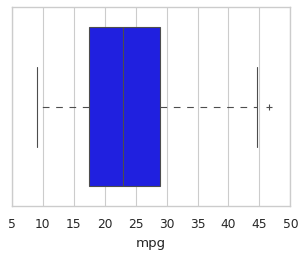

In [69]:
# boxplot 옆으로 눕히기
plt.figure(figsize=(4,3))
sns.boxplot(data=df_auto, x='mpg')

<Axes: ylabel='mpg'>

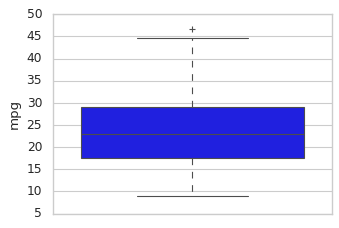

In [70]:
# boxplot 세로 방향
plt.figure(figsize=(4,3))
sns.boxplot(data=df_auto.mpg)

<Axes: ylabel='mpg'>

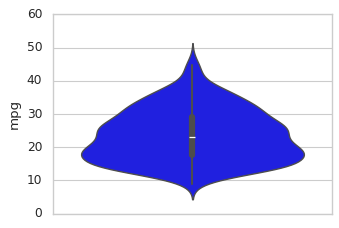

In [71]:
# violinplot 세로 방향
plt.figure(figsize=(4,3))
sns.violinplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

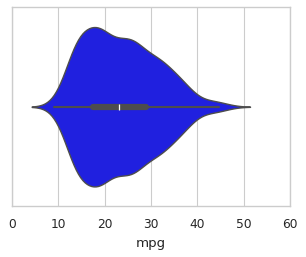

In [73]:
# violinplot 가로 방향
plt.figure(figsize=(4,3))
sns.violinplot(data=df_auto, x='mpg')

- sns.lineplot() 함수에서는 err_style 매개변수를 이용해 밴드의 스타일을 조정할 수 있습니다.
- 예를 들어, err_style='band'로 설정하면, 투명한 밴드가 그려지고, err_style='bars'로 설정하면, 오차 막대(error bar)가 그려집니다.

<Axes: xlabel='model year', ylabel='mpg'>

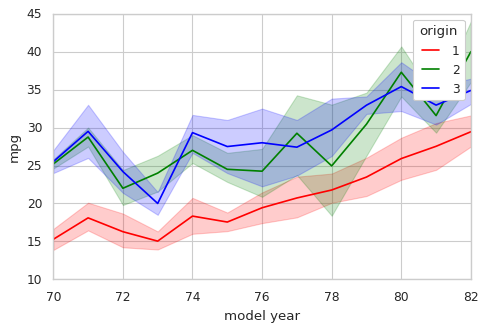

In [74]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_auto, x='model year', y='mpg', hue='origin', err_style='band', palette=['red','green','blue'])
# err_style = 오차 범위
# hue = 다중 그래프 사용할 경우 기준 변수

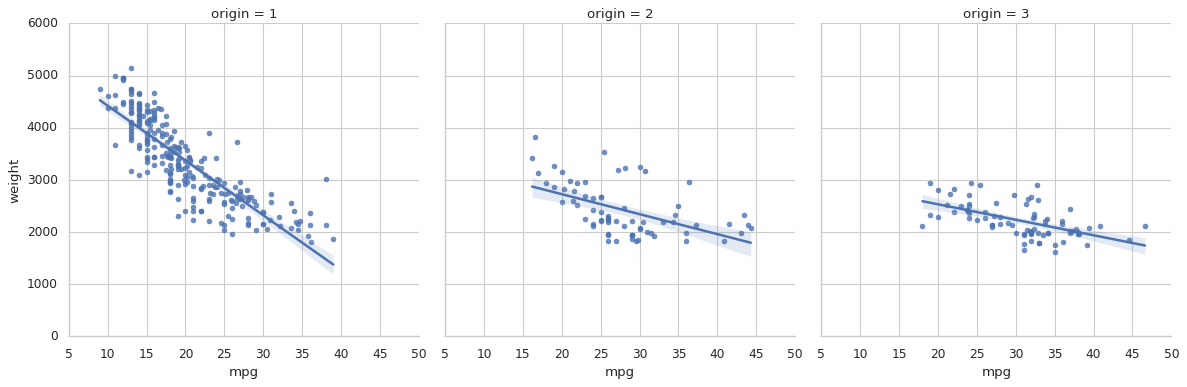

In [75]:
# 첫 번재 열 : 전체 데이터에 대한 그래프
sns.lmplot(x='mpg', y='weight', data=df_auto, col='origin',col_wrap=3)
# col_wrap=3는 한 행에 최대 3개의 그래프를 표시하도록 설정
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

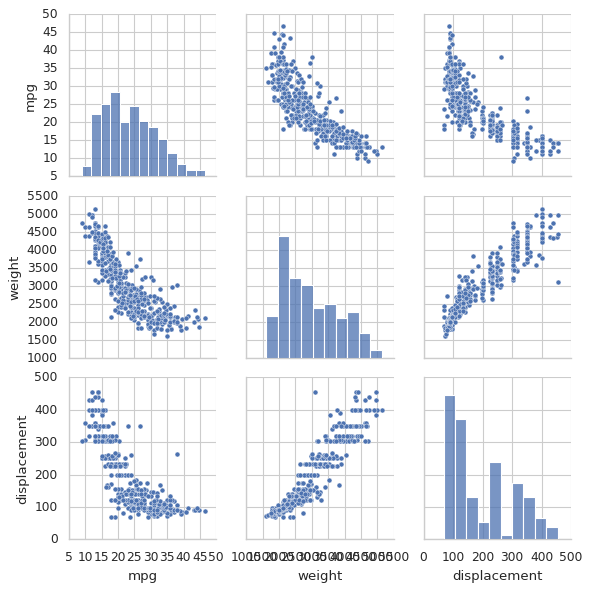

In [83]:
# pairplot
# 설정한 변수들을 1:1 관계로 x,y축에 놓고 그려줌
# 히스토그램은 자기 자신인 경우, scatter는 자신과 타 변수의 관계
sns.pairplot(df_auto[['mpg', 'weight','displacement']], palette='rainbow')

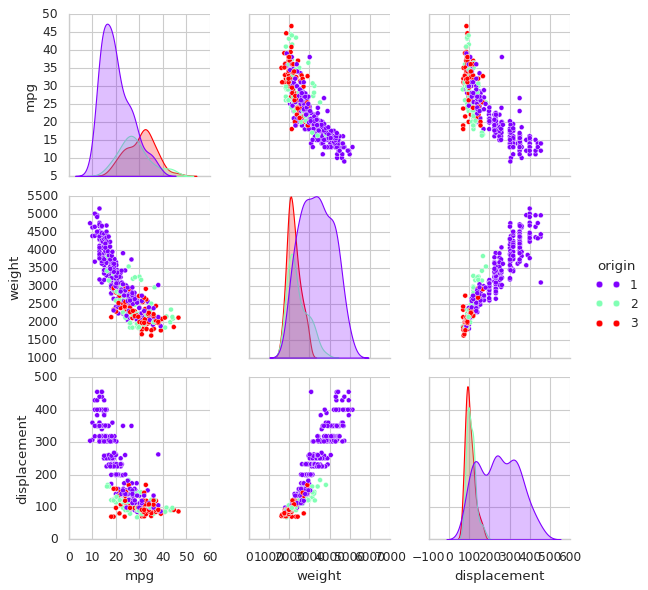

In [82]:
sns.pairplot(df_auto[['mpg', 'weight','displacement', 'origin']], hue='origin', palette='rainbow', diag_kind='kde')
# origin에 따라 색상이 들어감
# diag_kind 를 'kde' 로 지정해줌 (대각선으로 있는 그래프들 히스토그램 -> kde 로 변경됨 )

In [85]:
t_df=sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
t_df[['pclass','age','fare','survived']].corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


Text(0.5, 1.0, 'Heatmap of the Dataset')

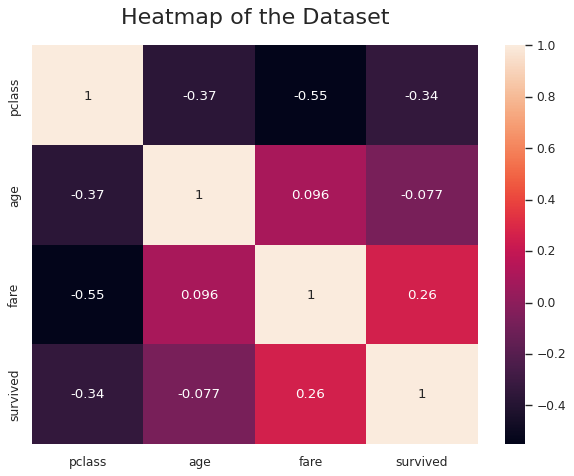

In [87]:
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset', pad=20, fontsize=20)

### 0618 과제

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task1_0618. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계 2개 작성)

In [1]:
from google.colab import files
filename=files.upload()

Saving auto-mpg.xlsx to auto-mpg.xlsx


In [5]:
auto=pd.read_excel('auto-mpg.xlsx')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


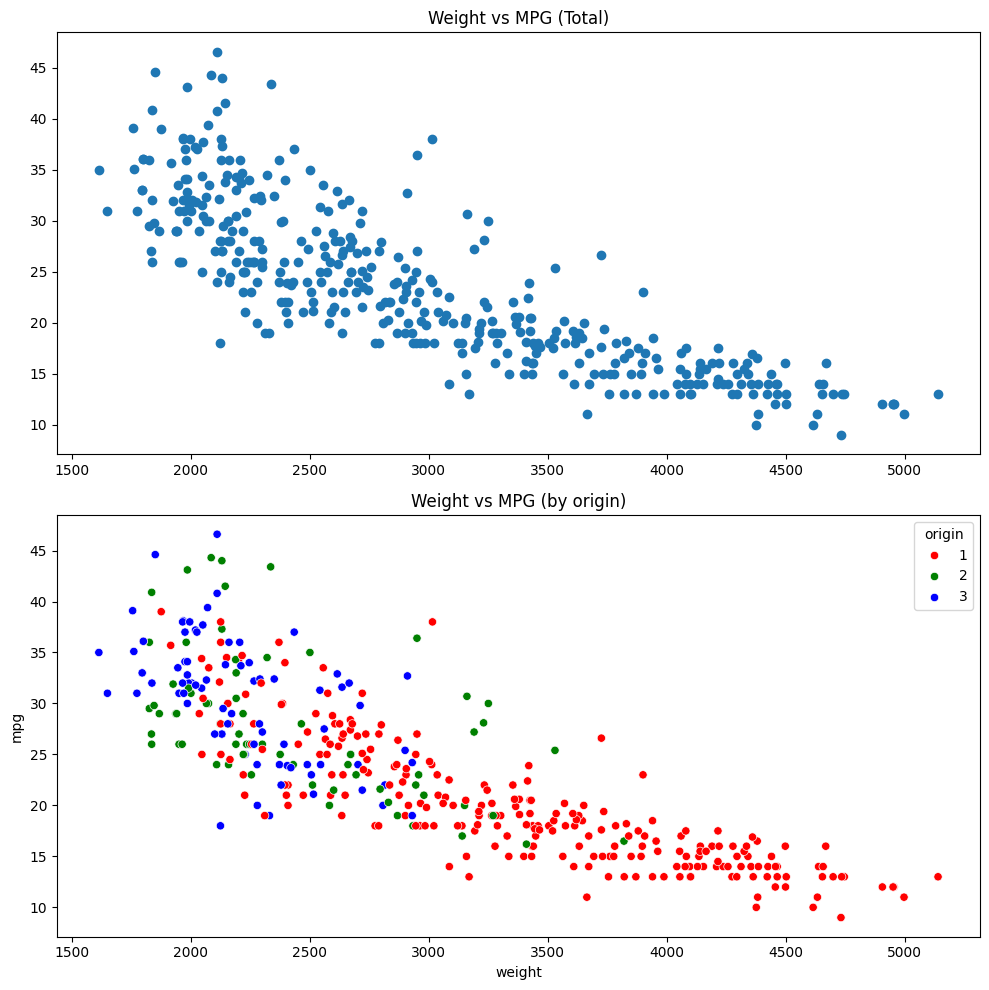

In [25]:
fig, axes=plt.subplots(2,1,figsize=(10,10))

# 전체
axes[0].scatter(x=auto.weight,y=auto.mpg)
axes[0].set_title('Weight vs MPG (Total)')

# origin에 따른 관계
sns.scatterplot(data=auto, x='weight', y='mpg', hue='origin', palette=['red','green','blue'], ax=axes[1])
axes[1].set_title('Weight vs MPG (by origin)')

plt.tight_layout()
plt.show()

Task2_0618. pairplot을 생성해서 컬럼간의 관계를 시각화하세요. 단 종에 따라 다른 색상를 사용.

In [32]:
df_pg=sns.load_dataset('penguins')
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


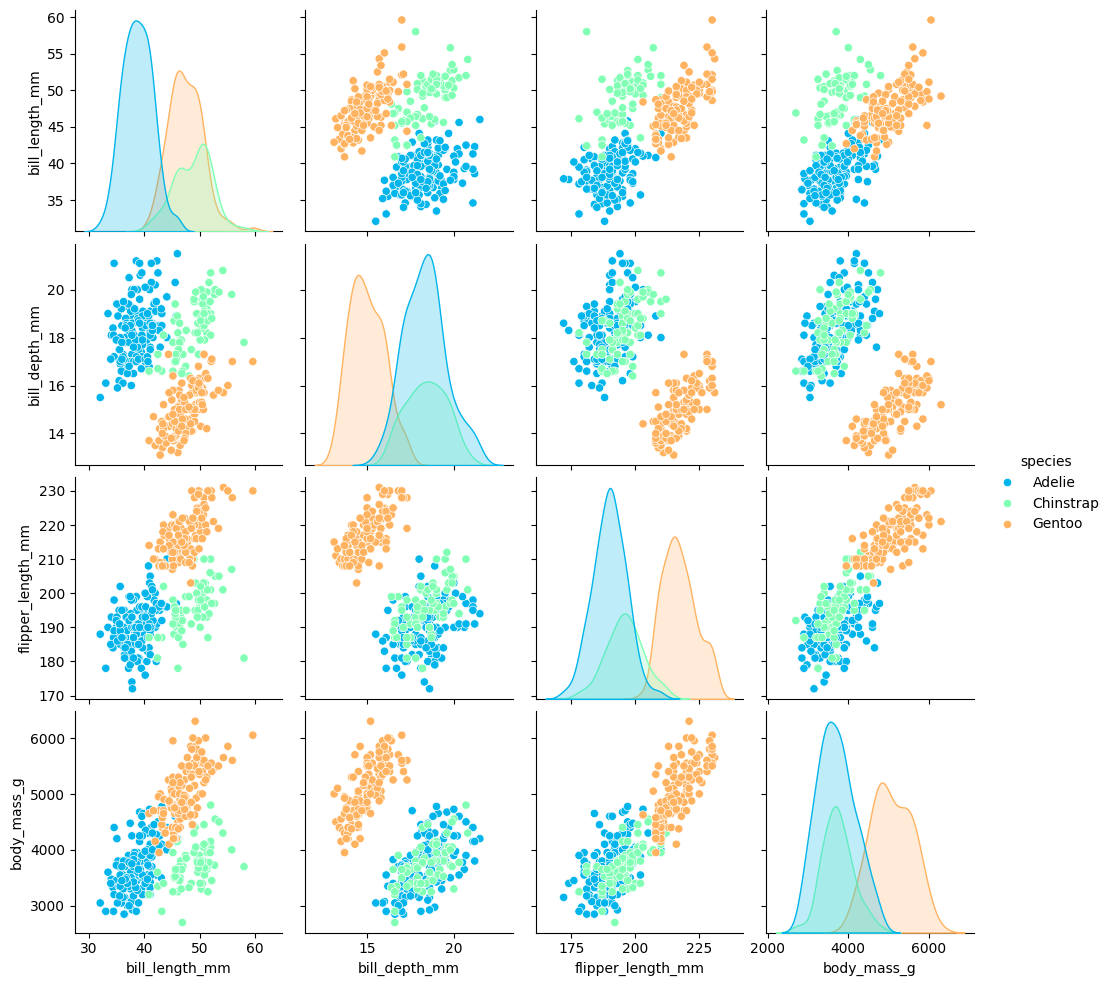

In [33]:
sns.pairplot(df_pg[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']], hue='species', palette='rainbow', diag_kind='kde')
plt.show()

Task3_0618. 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.

In [34]:
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


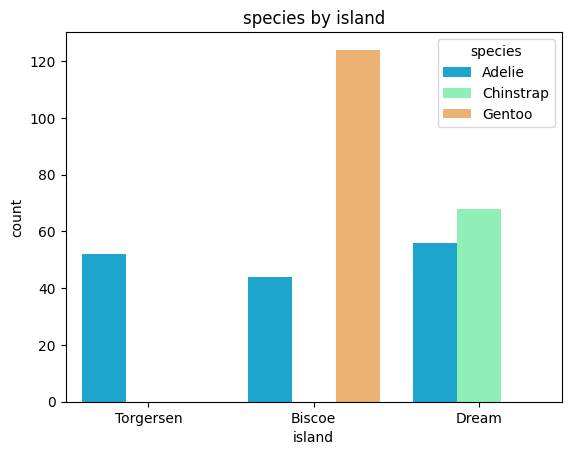

In [35]:
sns.countplot(x='island', data=df_pg, hue='species', palette='rainbow') # 타임 별 테이블 사이즈 (인원수)
plt.title("species by island")
plt.show()

Task4_0618. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요.

In [36]:
t_df=sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
t_df['sex'].replace({'male':0, 'female':1}, inplace=True)
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 's')

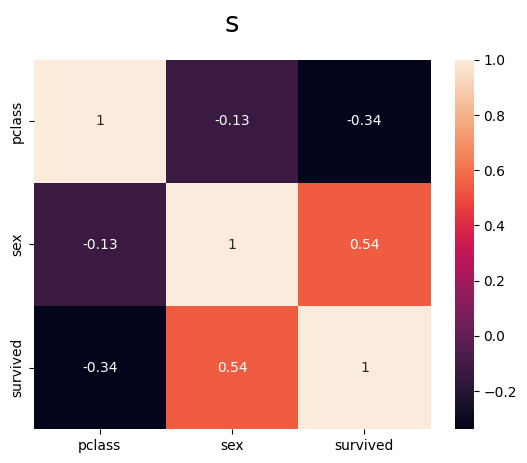

In [41]:
sns.heatmap(t_df[['pclass','sex','survived']].corr(),annot=True)
plt.title('s', pad=20, fontsize=20)

Task5_0618. 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.